# Interpolate data on 2D mesh

Interpolation of z=f(x,y) data on 2D mesh using interpolation functions of pretel (scipy).

In [1]:
import shutil
import numpy as np
from os import environ, path, remove
import matplotlib.pyplot as plt
from data_manip.extraction.telemac_file import TelemacFile
from pretel.interpolator import Interp2D, Interp2DChunk
from postel.plot2d import plot2d_triangle_mesh, plot2d_scalar_map

## Interpolate data using 2D interpolators of pretel (scipy)

Load telemac geometry or result file:

In [2]:
res_file = path.join(environ['HOMETEL'],'notebooks','data','geo_malpasset-small.slf')
res = TelemacFile(res_file, access='rw')

Load z=f(x,y) data to interpolate on mesh

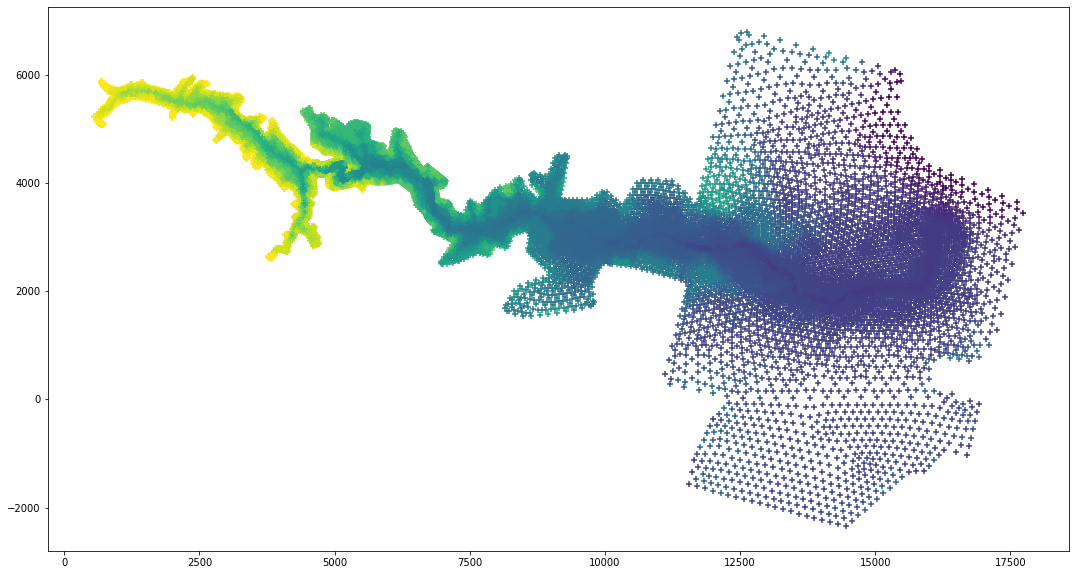

In [3]:
bathy_file = path.join(environ['HOMETEL'],'notebooks','data','bathy_malpasset.xyz')
xyz = np.loadtxt(bathy_file, delimiter=" ")

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_aspect('equal')
plt.scatter(xyz[:, 0], xyz[:, 1], c=xyz[:, 2], marker="+")
plt.show()
plt.close(fig)

Define an interpolator using Inter2D class, several methods are available:
* **method='nearest'**
* **method='linear'**
* **method='cubic'**

When using linear or cubic interpolators, all mesh points need to be contained in the convex hull defined by data points otherwise a default filling value is asigned. You can change this filling value with the argument "fill_value".

In [4]:
#interp = Interp2D(xyz, kind="nearest")
interp = Interp2D(xyz, kind="linear", fill_value=0.)

interpolate data on mesh

In [5]:
coord_x = res.tri.x
coord_y = res.tri.y

values_on_mesh = interp(coord_x, coord_y)

Add new data to result file

In [6]:
#res.add_data_value('BOTTOM', 0, values_on_mesh)

plot result:

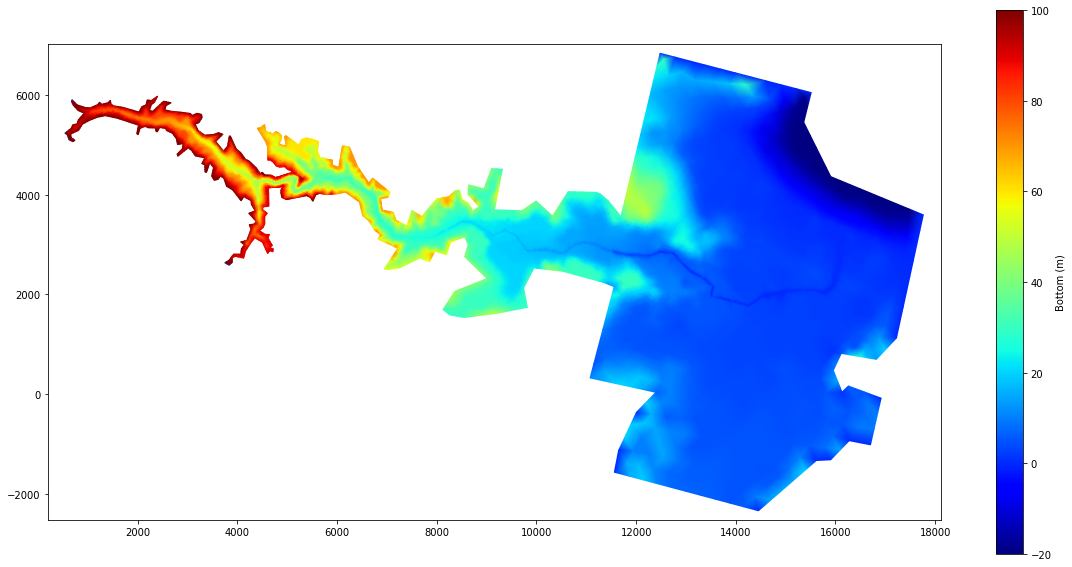

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_aspect('equal')

plot2d_scalar_map(fig, ax, res.tri, values_on_mesh, data_name='Bottom (m)')

plt.show()
plt.close(fig)

## Interpolate by chunk (useful for large data sets)

Interpolation by chunk might be usefull when dealing with large datasets.
In this case you need to specify the number of chunks on x and y axis with "px" and "py" arguments. "pe" stands for the overlapping of each chunk.

In [8]:
interp = Interp2DChunk(xyz, kind="linear", px=4, py=4, pe=0.25, fill_value=0.)

In [9]:
values_on_mesh = interp(coord_x, coord_y)

Interpolateur  1
Interpolateur  2
Interpolateur  3
Interpolateur  4
Interpolateur  5


Interpolateur  6
Interpolateur  7
Interpolateur  8
Interpolateur  9
Interpolateur  10
Interpolateur  11
Interpolateur  12
Interpolateur  13
Interpolateur  14


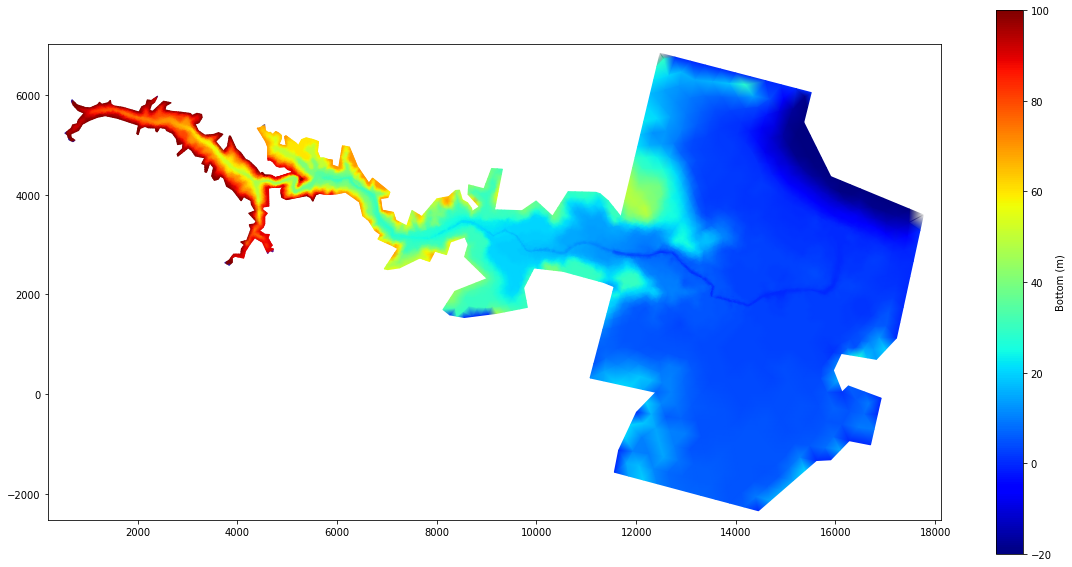

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_aspect('equal')

plot2d_scalar_map(fig, ax, res.tri, values_on_mesh, data_name='Bottom (m)', vmin=-20, vmax=100)

plt.show()
plt.close(fig)

## Interpolate data and save it in geometry file

You might want to save interpolated values directly in your geometry or result file. 
In this case, the functions "interpolate_xyz_on_mesh" and "set_data" from TelemacFile can be used.
You need to provide a .med or .slf file as well as xyz data and the name of the variable in which to store the interpolated values ("BOTTOM" for instance).

Initial geometry file without bathy data:

In [11]:
ori_file = path.join(environ['HOMETEL'],'notebooks','data','geo_malpasset-small.slf')

New geometry file containing the interpolated bathy data:

In [12]:
res_file = path.join(environ['HOMETEL'],'notebooks','data','geo_malpasset-small_with_bathy.slf')

Raw bathymetry data to interpolate on mesh:

In [13]:
bathy_file = path.join(environ['HOMETEL'],'notebooks','data','bathy_malpasset.xyz')

The new file is removed is it already exist:

In [14]:
print(f'{ori_file} -> {res_file}')
shutil.copy2(ori_file, res_file)

/home/d60881/telemac-mascaret/notebooks/data/geo_malpasset-small.slf -> /home/d60881/telemac-mascaret/notebooks/data/geo_malpasset-small_with_bathy.slf


'/home/d60881/telemac-mascaret/notebooks/data/geo_malpasset-small_with_bathy.slf'

Interpolation

In [15]:
res = TelemacFile(res_file, access='rw')

xyz = np.loadtxt(bathy_file, delimiter=" ")

interp_data = res.interpolate_xyz_on_mesh(
    xyz, 
    kind='linear',
    fill_value=0.)

res.set_data_value('BOTTOM', 0, interp_data)

res.close()

Plot interpolated data

In [16]:
res = TelemacFile(res_file)
bottom = res.get_data_value('BOTTOM', 0)
tri = res.tri
res.close()

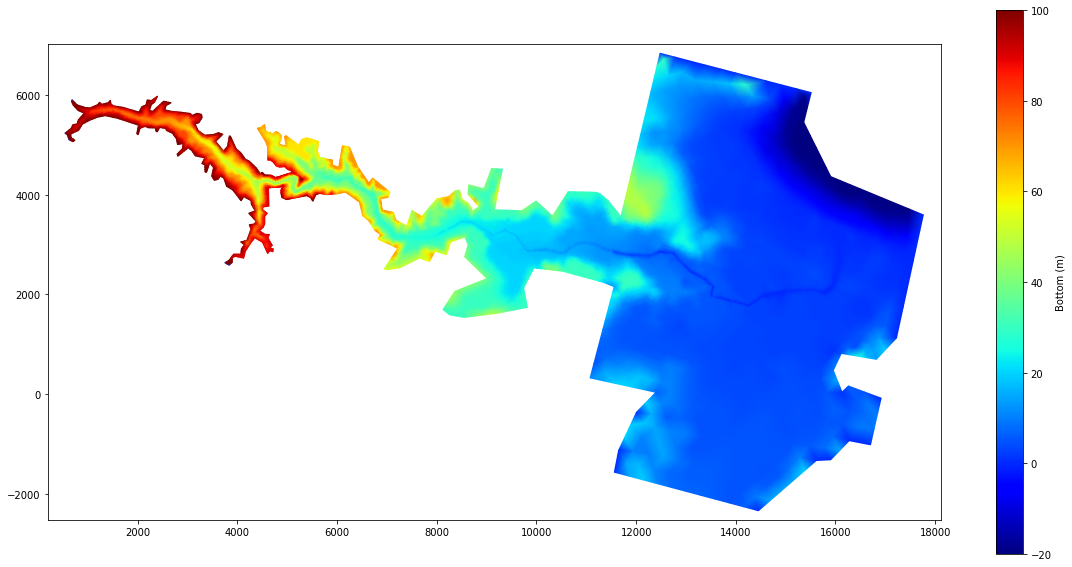

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_aspect('equal')

plot2d_scalar_map(fig, ax, res.tri, bottom, data_name='Bottom (m)')

plt.show()
plt.close(fig)